Correlation matrix:
                          temperature  traffic_volume  electricity_consumption
temperature                 1.000000       -0.007446                 0.053889
traffic_volume             -0.007446        1.000000                 0.177540
electricity_consumption     0.053889        0.177540                 1.000000

Traffic va Electricity Consumption correlation: 0.18


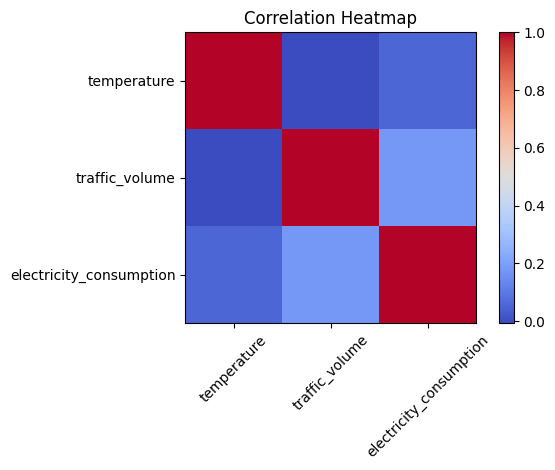

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import requests

api_url = "https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-sfc_obs_nc_pt_api"
params = {
    "obs": "ta",
    "tm1": "202306110000",
    "tm2": "202306110300",
    "itv": 10,
    "lon": 126.5329,
    "lat": 33.361,
    "authKey": "3ysqUXuHRcerKlF7h9XHOA"
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.text
    df_weather = pd.read_csv(
        io.StringIO(data),
        skiprows=1,
        names=["timestamp", "obs", "lon", "lat", "temperature", "extra"]
    )
    df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"], format="%Y%m%d%H%M")
    df_weather = df_weather[["timestamp", "temperature"]]
else:
    raise Exception(f"API request failed with status {response.status_code}")



timestamps = df_weather["timestamp"]
traffic_volume = np.random.randint(1000, 2000, size=len(timestamps))
electricity_consumption = np.random.randint(300, 500, size=len(timestamps))

df_other = pd.DataFrame({
    "timestamp": timestamps,
    "traffic_volume": traffic_volume,
    "electricity_consumption": electricity_consumption
})


df_merged = pd.merge(df_weather, df_other, on="timestamp", how="inner")

corr_matrix = df_merged[["temperature", "traffic_volume", "electricity_consumption"]].corr()
print("Correlation matrix:\n", corr_matrix)

corr_value = df_merged["traffic_volume"].corr(df_merged["electricity_consumption"])
print(f"\nTraffic va Electricity Consumption correlation: {corr_value:.2f}")


plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()